In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=dd7bd20065db69c150e5f2f549bba6f558d0ff1332c4e4f5a68e12ed70a40191
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

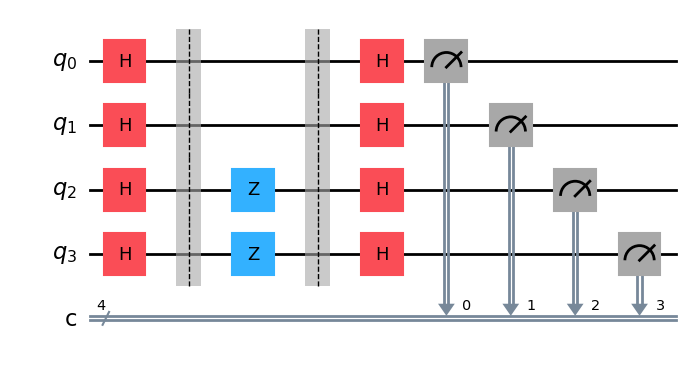

In [39]:
from qiskit import QuantumCircuit

n = 4
qc = QuantumCircuit(n,n)

qc.h(range(0,4))
qc.barrier()
qc.z(2)
qc.z(3)
qc.barrier()
qc.h(range(0,4))
qc.measure(range(0,4),range(0,4))

qc.draw('mpl')

In [40]:
# PUBs on aer Simulator
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2
from qiskit_aer import AerSimulator

aer_simulator = AerSimulator()

sampler_aer = SamplerV2(mode = aer_simulator)

qc_tr = transpile(qc, backend = aer_simulator)

job_aer = sampler_aer.run([(qc_tr,None,100),(qc_tr,None,1000)]) #PUB = (circuit, paramters, shots)



In [41]:
results_aer = job_aer.result()
counts_100 = results_aer[0].data.c.get_counts()

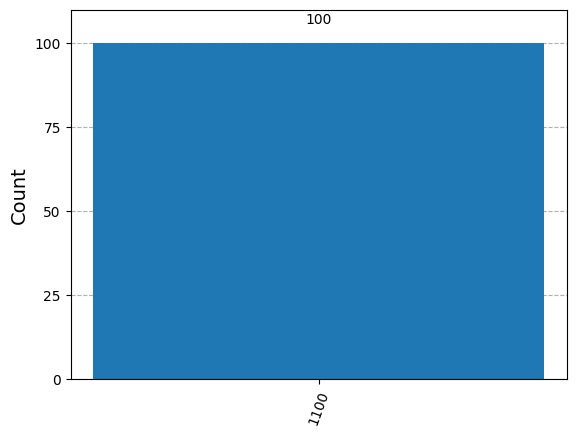

In [42]:
from qiskit.visualization import plot_histogram, plot_distribution

plot_histogram(counts_100)

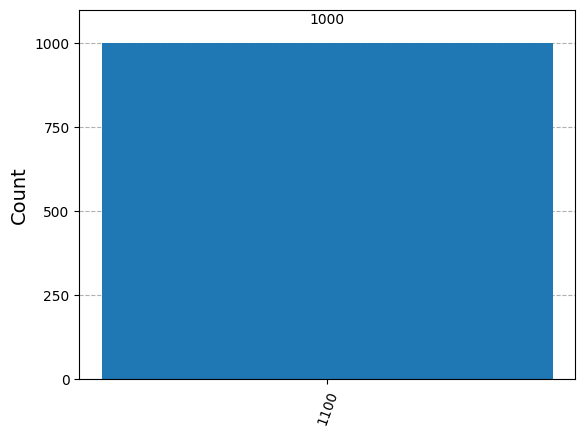

In [43]:
counts_1000 = results_aer[1].data.c.get_counts()
plot_histogram(counts_1000)

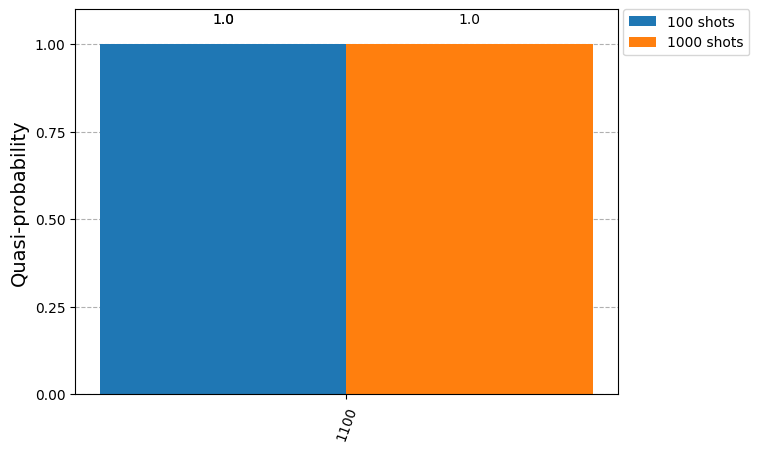

In [44]:
plot_distribution([counts_100,counts_1000], legend=["100 shots","1000 shots"])

In [45]:
# PUBs on IBM quantum computers
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2, QiskitRuntimeService

ibm_service = QiskitRuntimeService(channel = "ibm_quantum", token = "efd9e23135a46ce75fb01f5c280d95156b5c257cd71135ab8eb9be148a5995bf025361f80560ce463e686a7890095e318bbf6d894e1c4db973786b7d102d6d4d")


In [46]:
ibm_qcomp = ibm_service.backend("ibm_kyiv")
sampler_ibm = SamplerV2(mode=ibm_qcomp)

qc_tr_ibm = transpile(qc, backend = ibm_qcomp)

job_ibm = sampler_ibm.run([(qc_tr_ibm,None,100),(qc_tr_ibm,None,1000)]) #PUB = (circuit, paramters, shots)

In [47]:
print(job_ibm.job_id())

cym51e59b62g0082vzh0


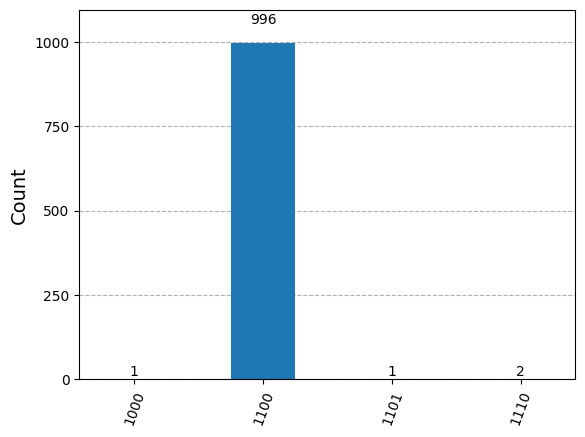

In [51]:
job_id = "cym51e59b62g0082vzh0"
job_ibm = ibm_service.job(job_id)
#The results will be available when the job finishes.
results_ibm = job_ibm.result()
counts_ibm = results_ibm[1].data.c.get_counts()
plot_histogram(counts_ibm)

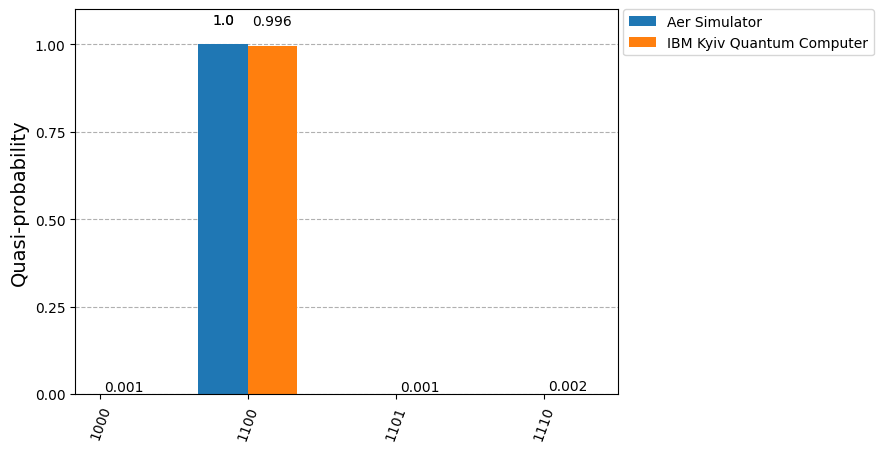

In [52]:
from qiskit.visualization import plot_distribution
plot_distribution([counts_1000,counts_ibm],legend=["Aer Simulator", "IBM Kyiv Quantum Computer"])